# Prime circles

Concentric circles separated in prime numbers of segments.

Inspired by [this tweet](https://twitter.com/Aldernero/status/1290063978719141888)

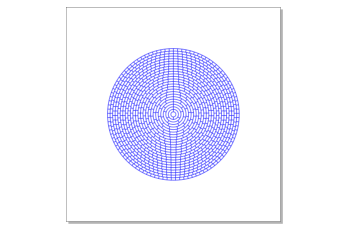

In [1]:
import math

import numpy as np

import vsketch

N = 100
RANDOM_PHASE = False


def get_primes(n):
    numbers = set(range(n, 1, -1))
    primes = []
    while numbers:
        p = numbers.pop()
        primes.append(p)
        numbers.difference_update(set(range(p * 2, n + 1, p)))
    return primes


vsk = vsketch.Vsketch()
vsk.size("10in", "10in")
vsk.scale("3mm")

for i, prime in enumerate(get_primes(N)):
    vsk.circle(0, 0, 2 * (i + 1))

    if RANDOM_PHASE:
        phase = np.random.random() * 2 * math.pi
    else:
        phase = -math.pi / 2

    for angle in np.linspace(0, 2 * math.pi, prime, endpoint=False):
        vsk.line(
            (i + 1) * math.cos(angle + phase),
            (i + 1) * math.sin(angle + phase),
            (i + 2) * math.cos(angle + phase),
            (i + 2) * math.sin(angle + phase),
        )

vsk.circle(0, 0, 2 * (i + 2))
vsk.vpype("linemerge linesort")


vsk.display()
vsk.save("prime_circles.svg")